# 라이브러리

In [45]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 경로 설정

In [46]:
data_path = '../data'
data_name = '/feature_choice.csv'

# 데이터 읽어 오기

In [50]:
data_set = pd.read_csv(data_path + data_name, delimiter = ',')
data_set.dropna(inplace = True)
data_set = data_set.drop(columns = ['index'])

x_data = data_set.drop(columns = ['quality'])
y_data = data_set['quality']

x_data = x_data.values.tolist()
y_data = y_data.values.tolist()

# train_set 설정

In [51]:
train_size = int(len(x_data) * 0.7)

x_train = x_data[:train_size]
x_train = np.array(x_train, dtype = np.float32)

y_train = y_data[:train_size]
y_train = [i-3 for i in y_train]
y_train = np.array(y_train, dtype = np.int32)
y_train = y_train.reshape([-1,1])

# test_set 설정

In [52]:
x_test = x_data[train_size:]
x_test = np.array(x_test, dtype = np.float32)

y_test = y_data[train_size:]
y_test = [i-3 for i in y_test]
y_test = np.array(y_test, dtype = np.int32)
y_test = y_test.reshape([-1,1])

# 하이퍼파라미터 설정

In [53]:
class_dict = {}

for i in y_train:
    class_dict[i[0]] = 1

In [59]:
x_de = len(x_train[0])
classes = len(class_dict)
learning_rate = 0.1

# 로지스틱 설정

# 1 layer

In [84]:
x = tf.placeholder(tf.float32, shape = [None, x_de])
y = tf.placeholder(tf.int32, shape = [None, 1])

y_one_hot = tf.one_hot(y, classes)
y_one_hot = tf.reshape(y_one_hot, [-1,classes])

W = tf.get_variable("W", shape = [x_de,classes], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([classes]))

logits = tf.matmul(x,W) + b
h = tf.nn.softmax(logits)

# output layer

In [85]:
cost = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_one_hot)
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

predict = tf.argmax(h,1)
acc = tf.reduce_mean(tf.cast(tf.equal(predict, tf.argmax(y_one_hot, 1)), dtype = tf.float32))

# 돌리기

In [88]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    cost_x = []
    cost_y = []
    
    for step in range(2001):
        temp = 0
        c, _ = sess.run([cost, train], feed_dict = {x : x_train, y : y_train})
        
        cost_x.append(step)
        
        for i in c:
            temp += i
        cost_y.append(temp/float(x_de))
        
        if(step % 100 == 0):
            print("Step : {}, cost : {}".format(step,c))
        
    for step in range(2001):
        ac = sess.run([acc], feed_dict = {x : x_test, y : y_test})
        
    print("Accuracy : {}%".format(ac[0] * 100))

Step : 0, cost : [146.41988 112.84239  84.69603 ...  86.36162  81.81944  41.62042]
Step : 100, cost : [0.78574383 0.64305735 0.7763623  ... 0.7744125  0.7794217  0.7348775 ]
Step : 200, cost : [0.92655957 0.7872629  0.8393336  ... 0.85271    0.84361994 0.805186  ]
Step : 300, cost : [0.55246794 0.5409338  0.6178083  ... 0.63659203 0.6412529  0.6533785 ]
Step : 400, cost : [0.5354897  0.5429697  0.6240285  ... 0.60406274 0.61767125 0.6244302 ]
Step : 500, cost : [0.53646034 0.5556296  0.6328592  ... 0.59323657 0.6124867  0.6054002 ]
Step : 600, cost : [0.5406689  0.5670223  0.64019203 ... 0.58062756 0.60636896 0.5896878 ]
Step : 700, cost : [0.5438285  0.5757818  0.64577    ... 0.57424515 0.6055967  0.57933474]
Step : 800, cost : [0.54629374 0.5823213  0.64990747 ... 0.56973946 0.6065587  0.5722308 ]
Step : 900, cost : [0.54366434 0.5827007  0.6472245  ... 0.5702177  0.61226463 0.5677279 ]
Step : 1000, cost : [0.5487807  0.5897723  0.65493697 ... 0.55858004 0.6050037  0.5627799 ]
Step :

# 그래프 그리기

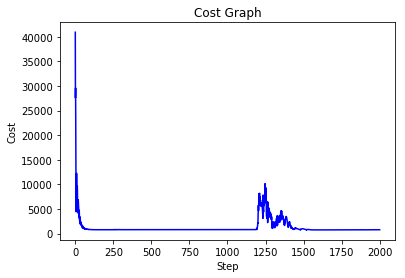

In [89]:
plt.plot(cost_x, cost_y, 'b-')
plt.title("Cost Graph")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show()